*First compiled: March 18, 2018.*

# Benchmarking nearest-neighbor computations

In [12]:
import time
import pandas as pd
import random as rd
import matplotlib.pyplot as pl
import numpy as np
from collections import OrderedDict
from scanpy.neighbors import compute_neighbors_numpy
from utils import scanpy0, scanpy1

functions = [scanpy1, scanpy0]

n_observations = [5000, 10000, 20000, 40000]
n_dimensions = 50
n_neighbors = 20

In [13]:
total_times = OrderedDict([(f.__name__, []) for f in functions])
for n in n_observations:
    times = {}
    X = np.random.rand(n, n_dimensions)
    print('X shape:', (n, n_dimensions))    
    for func in functions:
        name = func.__name__
        t0 = time.time()
        func(X, n_neighbors=n_neighbors)
        diff = time.time() - t0
        print('  {:40} : {:5.1f} s'.format(name, diff))
        total_times[name].append(diff)
pd.DataFrame(total_times).to_csv('total_times.csv')

X shape: (5000, 50)
  scanpy1                                  :   1.3 s
  scanpy0                                  :   1.4 s
X shape: (10000, 50)
  scanpy1                                  :   6.7 s
  scanpy0                                  :   3.8 s
X shape: (20000, 50)
  scanpy1                                  :   9.0 s
  scanpy0                                  :  16.1 s
X shape: (40000, 50)
  scanpy1                                  :  19.9 s
  scanpy0                                  : 138.7 s


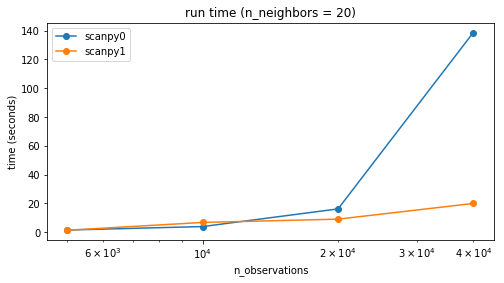

In [16]:
total_times = pd.read_csv('total_times.csv')
pl.figure(figsize=(8, 4))
for name, values in total_times[['scanpy0', 'scanpy1']].items():
    pl.semilogx(n_observations, values, marker='o', label=name)
pl.title('run time (n_neighbors = {})'.format(n_neighbors))
pl.xlabel('n_observations')
pl.ylabel('time (seconds)')
pl.legend()
pl.savefig('./figures/time-n_neighbors{}.svg'.format(n_neighbors))
pl.show()